In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorflow
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()


meta = pd.read_csv('metadata.csv')
x_train = pd.read_csv('transformed_features.csv')

x_train['activity'] = meta['activity']
x_trains = x_train.dropna()
y = x_trains['activity']
x_trains = x_trains.drop(columns='activity',axis=1)
x_trains.shape

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)
from sklearn.preprocessing import StandardScaler

# standardization
X_train.shape



In [31]:
from keras.models import Sequential #sequential is required to initialise the neural network
from keras.layers import Dense      #dense is used to build the layers
from keras.layers import Dropout    #Dropout Layer in order to prevent Regularization in the network
#Initialising the deep learning model
#Defining the model as a sequence of layers
classifier = Sequential()
classifier.add(Dense(112, input_dim = 6503, kernel_initializer='uniform', activation='relu', ))
#creating a network of 561 X 48 X 24 X 12 X6
classifier.add(Dropout(0.1))
classifier.add(Dense(24, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(12, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(6, kernel_initializer='uniform', activation='softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size=20, epochs=10, verbose = 4)


Epoch 1/10


ValueError: in user code:

    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 6503), found shape=(None, 112)


In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
model = Sequential()
# RNN layer
model.add(LSTM(units = 128))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


((6503, 112), (1626, 112))

In [15]:
from keras.models import Sequential #sequential is required to initialise the neural network
from keras.layers import Dense      #dense is used to build the layers
from keras.layers import Dropout    #Dropout Layer in order to prevent Regularization in the network
#Initialising the deep learning model
#Defining the model as a sequence of layers
classifier = Sequential()
classifier.add(Dense(48, input_dim = 561, kernel_initializer='uniform', activation='relu', ))
#creating a network of 561 X 48 X 24 X 12 X6
classifier.add(Dropout(0.1))
classifier.add(Dense(24, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(12, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(6, kernel_initializer='uniform', activation='softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size=20, epochs=10, verbose = 4)


Epoch 1/10


ValueError: in user code:

    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 561), found shape=(None, 112)


In [5]:
from sklearn import preprocessing

meta = pd.read_csv('metadata.csv')
x_train['activity'] = meta['activity']
x_trains = x_train.dropna()
y = x_trains['activity']
x_trains = x_trains.drop(columns='activity',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_trains,y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape




((6503, 112), (1626, 112))

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
# SVM model
SvmModel=svm.SVC()
X_train_data_lr.shape, X_test_data_lr.shape



((6503, 112), (1626, 112))

In [33]:
parameters=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100]}, {'kernel': ['linear'], 'C': [1, 10, 100]}]
model=GridSearchCV(SvmModel,parameters,n_jobs=-1,cv=4,verbose=4)
model.fit(X_train_data_lr,y_train)
#svm = SVC(C=100, kernel='rbf', gamma=1)
#svm.fit(X_train_data_lr, y_train)
#y_pred = SvmModel.predict(X_test_data_lr)
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("\n -------------Classification Report-------------\n")
#print(classification_report(y_test, y_pred))

# View the accuracy score
print('Best score for training data:', model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',model.best_estimator_.C,"\n") 
print('Best Kernel:',model.best_estimator_.kernel,"\n")
print('Best Gamma:',model.best_estimator_.gamma,"\n")

Fitting 4 folds for each of 18 candidates, totalling 72 fits


Accuracy: 0.9360393603936039
Best Parameters:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

 -------------Classification Report-------------

              precision    recall  f1-score   support

  Downstairs       0.77      0.80      0.78       128
     Jogging       0.98      0.98      0.98       523
     Sitting       0.98      0.98      0.98       100
    Standing       0.99      0.97      0.98        74
    Upstairs       0.76      0.72      0.74       141
     Walking       0.96      0.96      0.96       660

    accuracy                           0.94      1626
   macro avg       0.91      0.90      0.90      1626
weighted avg       0.94      0.94      0.94      1626



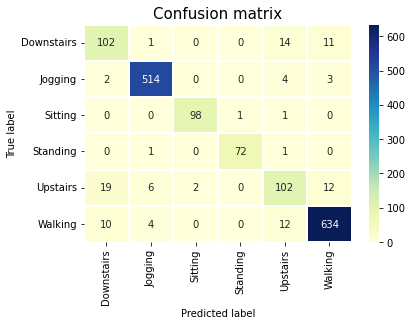

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_data_lr)
print("Accuracy:", accuracy_score(y_test, y_pred))

print('Best Parameters: ',model.best_params_)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))
final_model = model.best_estimator_

Y_predBest = final_model.predict(X_test_data_lr)
# Making the Confusion Matrix
labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
confusion_matrix = confusion_matrix(y_test, Y_predBest)
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [30]:
solu = pd.read_csv('signals_test.csv')
solu_test = transformation(solu)


In [20]:
solu_x_test = scaler.transform(solu_test)
prediction = final_model.predict(solu_x_test)
submit = pd.read_csv('predictions_sample.csv')
submit['prediction'] = prediction
submit.to_csv('submitSVMRP2.csv',index=False)